### 07. MNIST 

- cf. torchvision
    - MNIST등 다양한 데이터셋과, Alexnet/GoogLeNet 등 유명한 알고리즘을 포함 
    - torchvision.utils, torchvision.transform을 통해 다양한 이미지 변환 기능 제공 
    - url : https://pytorch.org/docs/stable/torchvision/index.html 

In [10]:
#!pip install torchvision

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import random 

In [2]:
#!pip install ipywidgets

In [3]:
## load datasets 
## MNIST는 28 x 28 = 784 pixel로 이루어진 이미지, 즉 784개의 input값으로 부터 0~9까지의 9개의 output을 예측하는 문제다. 

mnist_train = dsets.MNIST(root = 'MNIST_data/',   ## 데이터의 위치 
                         train = True,           ## train data를 가져온다 (False이면 test data를 가져옴)
                         transform = transforms.ToTensor(),  ## 파이토치 텐서 형태로 변환 
                         download = True )       ## 다운로드 하라 (단 먼저 받아놓았으면 스킵)

mnist_test  = dsets.MNIST(root = 'MNIST_data/',   
                         train = False,           
                         transform = transforms.ToTensor(),  
                         download = True ) 

In [4]:
## data loader : 원하는 형태로 데이터를 정제하여 가져온다. 
## mnist_train을, 100개씩, 섞어서, 배치사이즈로 자르고 남는 것(짜투리)은 버리고 가져오라 
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, 
                                         batch_size = 100, 
                                         shuffle = True, 
                                         drop_last = True) 

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## model, Loss function, Optimizer 세팅 
## 모델은 입력크기 784 & 출력 10인 선형 함수.(굳이 Softmax를 구현하지 않은 이유: 이후 CrossEntropyLoss 함수에 Softmax가 포함)
linear = nn.Linear(784, 10, bias = True).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(linear.parameters(), lr = 0.1)

- 모든설정 완료. 훈련 시작 

In [6]:
## batch size 만큼 training 반복 
## view(-1)은 reshape를 파이토치가 알아서 하라는 뜻 (*즉 [?, 784]로 변경하라는 의미)

for epoch in range(10) : 
    avg_cost = 0 
    total_batch = len(data_loader)
    
    for X, Y in data_loader : 
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch     
        
    print('epoch:{}  cost= {:.4f}'.format(epoch+1, avg_cost))

epoch:1  cost= 0.5340
epoch:2  cost= 0.3590
epoch:3  cost= 0.3307
epoch:4  cost= 0.3163
epoch:5  cost= 0.3068
epoch:6  cost= 0.2999
epoch:7  cost= 0.2947
epoch:8  cost= 0.2906
epoch:9  cost= 0.2871
epoch:10  cost= 0.2844


- test set을 사용한 validation 

In [19]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    
    #print('Accuracy:', accuracy.item())
    print('Accuracy: {:.4f}%'.format(accuracy.item()*100))

Accuracy: 88.8500%


- 참고) matplotlib를 사용한 시각화 

Label:  9
Prediction:  9


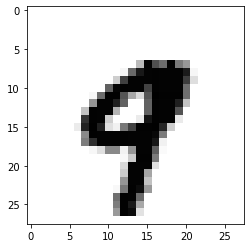

In [14]:
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

single_prediction = linear(X_single_data)
print('Label: ', Y_single_data.item())
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()